In [1]:
import torch
import time
import torchviz

from mesh_dataset import MeshDataset
from torch.utils.data import DataLoader
from gnn_simplification_model import GNNSimplificationMesh
from loss.loss import total_loss
from tqdm import tqdm

Starting epoch 1


Iterate data:   0%|          | 0/1 [00:00<?, ?it/s]

init input :  0.007336854934692383
gnn_model l1 :  0.5505261421203613
gnn_model l2 :  0.000997304916381836
gnn_model l3 :  0.0
gnn_model :  0.6004185676574707


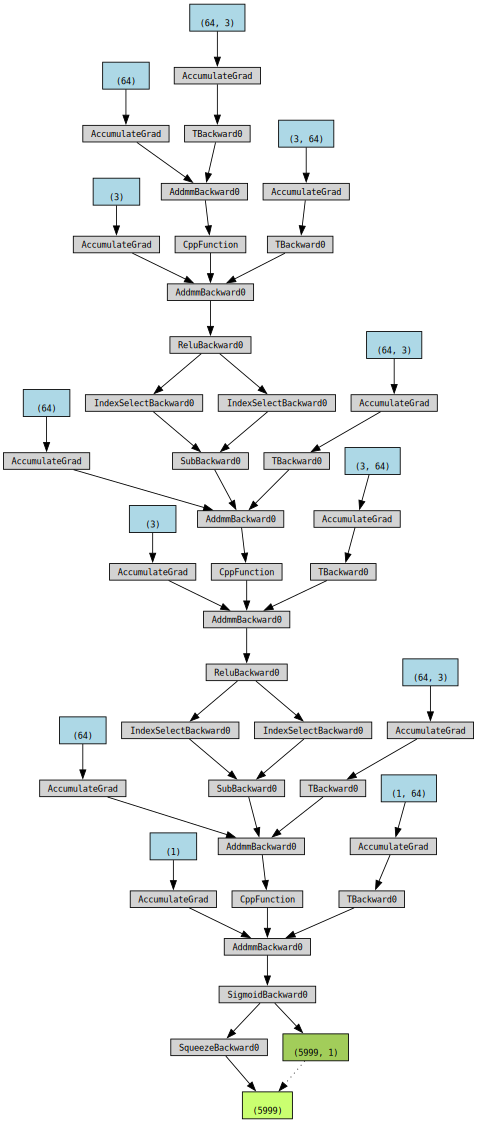

multinomial :  0.0029838085174560547


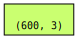

knn simple :  0.0


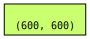

simple devconv :  0.001995086669921875


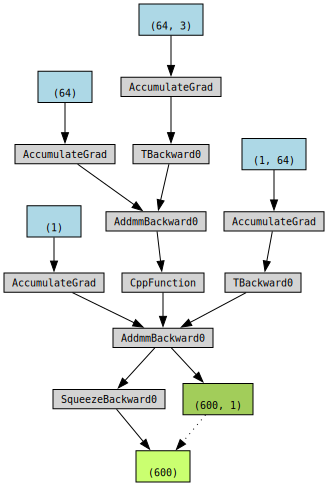

sparse attention edge predictor :  0.0009980201721191406


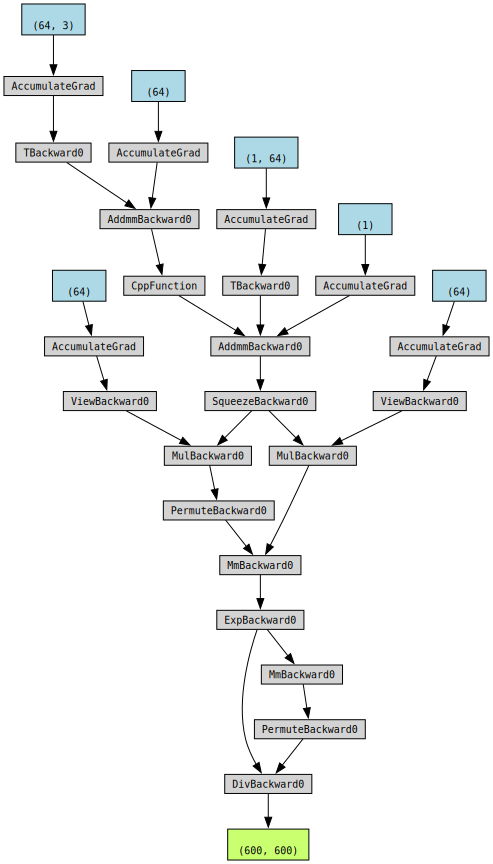

face candidate :  0.000997304916381836


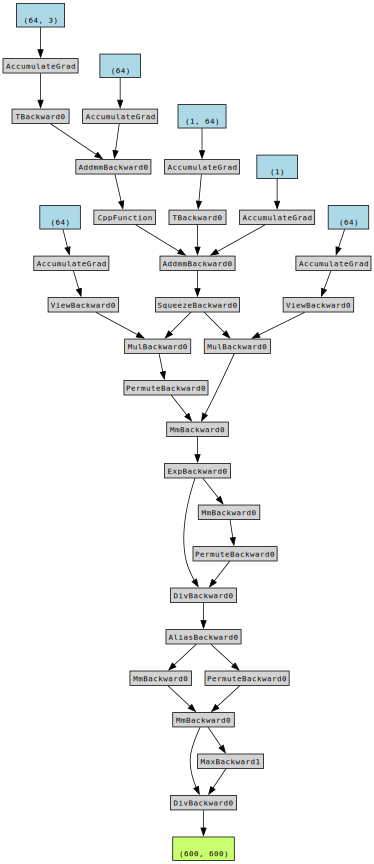

triangle indexes :  0.010970592498779297


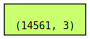

traingle node :  0.0


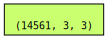

first p init :  0.0009970664978027344


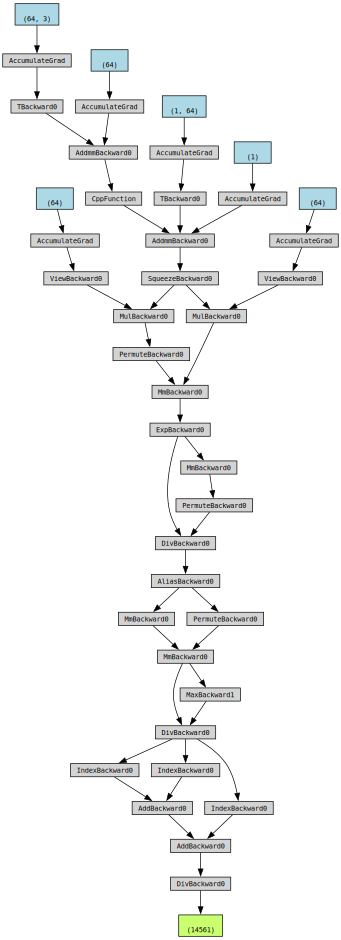

barycenter :  0.0009968280792236328


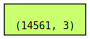

knn :  0.1445600986480713


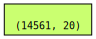

r matrix :  0.002991914749145508


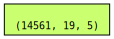

mlp :  0.022939682006835938


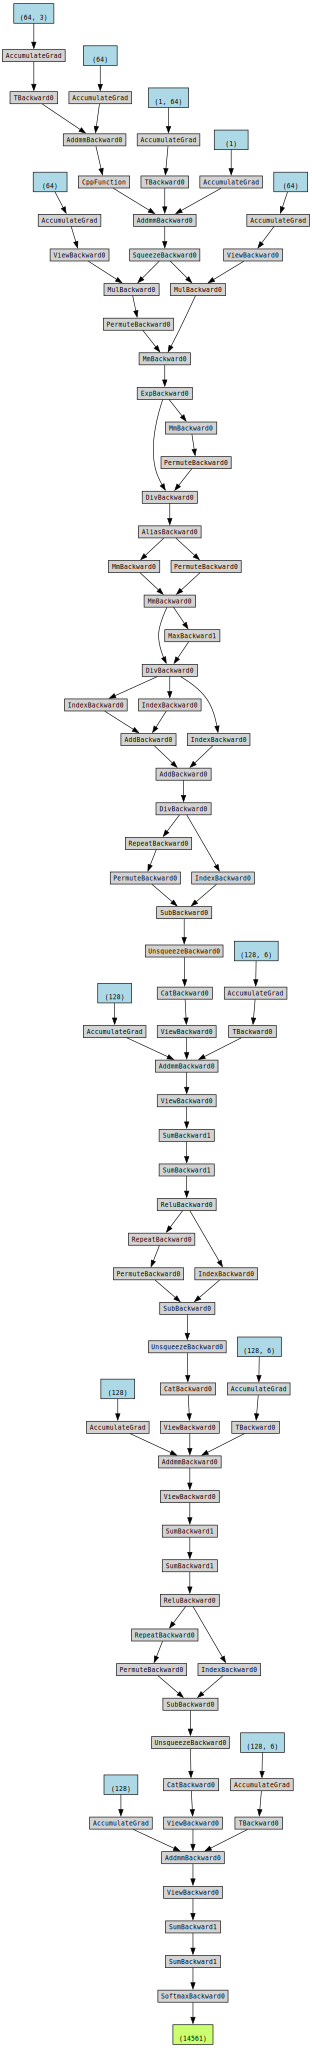

selected triangles topk :  0.0


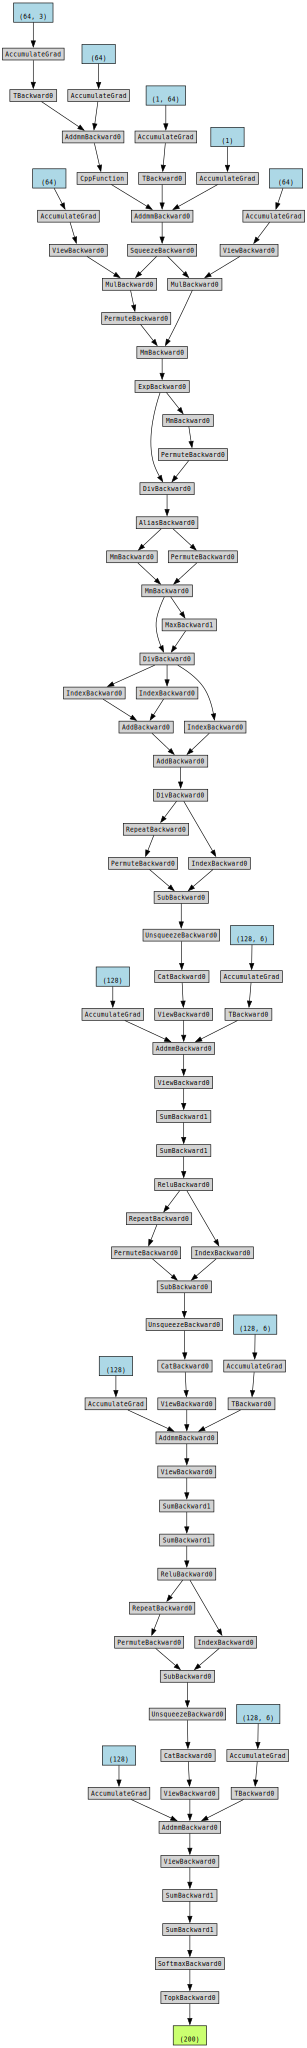

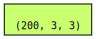

In [2]:
import torch
import time

from mesh_dataset import MeshDataset
from torch.utils.data import DataLoader
from gnn_simplification_model import GNNSimplificationMesh
from loss.loss import total_loss
from tqdm import tqdm

torch.manual_seed(42)


def train():
    number_neigh_tri = 20

    # if len(graph._node)<20:
    #     raise Exception("Input mesh does not have enough vertices. (More than 20 is needed)")

    torch_dataset = MeshDataset("../3d_models/stl/")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    gnn_model = GNNSimplificationMesh(number_neigh_tri, True).to(device)
    optimizer = torch.optim.Adam(gnn_model.parameters(), lr=1e-5, weight_decay=0.99)


    for epoch in range(0, 1): 
        print(f'Starting epoch {epoch+1}')
        
        current_loss = 0.0
        start = time.time()
        for i, (torch_graph, triangles) in tqdm(enumerate(torch_dataset), total=len(torch_dataset), desc='Iterate data', leave=False):
            
            # optimizer.zero_grad()
            end = time.time()
            print('init input : ', end - start)
            selected_triangles = gnn_model(200, torch_graph)

            # s = torch.sum(selected_triangles)
            # display(torchviz.make_dot(s))
            
    #         start = time.time()
    #         loss = total_loss(gnn_model.score_original_points, 
    #                         #   graph_nodes, 
    #                           gnn_model.generated_graph_nodes, 
    #                           gnn_model.selected_triangles_probabilities, 
    #                           selected_triangles, 
    #                           gnn_model.original_barycenters)
    #         end = time.time()
    #         print('loss : ', end - start)
            
    #         current_loss += loss.item()
    #         if i % 500 == 499:
    #             print('Loss after mini-batch %5d: %.3f' %
    #                 (i + 1, current_loss / 500))
    #             current_loss = 0.0
            
    #         start = time.time()
    
    # start = time.time()
    # loss.backward()        
    # end = time.time()
    # print('backward : ', end - start)

    # for name, param in gnn_model.named_parameters():
    #     print(name)
    #     print(param.shape)
    #     # print(param.grad)
    #     print('')

    # optimizer.step()            
    # print('Training process has finished.')

train()